<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear regression using Python (supervised machine learning)

### Introduction to Linear Regression

Linear regression is a fundamental statistical technique used to model the relationship between two or more variables. In the simplest case, we look at the relationship between a single independent variable (often denoted as $X$) and a dependent variable (often denoted as $Y$). The goal is to find a linear equation that best describes how $Y$ changes as $X$ changes.

Think about how biological phenomena often show trends. For example, as the dosage of a drug increases, the response in an organism might increase. Or, as the age of a tree increases, its height might also increase. Linear regression helps us quantify these relationships and make predictions.

The basic idea is to fit a straight line through the data points that minimizes the distance between the line and the points. This line represents the linear relationship we are trying to model.

#### Simple Linear Regression

In simple linear regression, we model the relationship between one independent variable ($X$) and one dependent variable ($Y$). The equation for a straight line is:

$Y = \beta_0 + \beta_1 X + \epsilon$

Where:
- $Y$ is the dependent variable (the outcome we are trying to predict or explain).
- $X$ is the independent variable (the variable we think influences $Y$).
- $\beta_0$ is the y-intercept. This is the expected value of $Y$ when $X$ is 0.
- $\beta_1$ is the slope of the line. This tells us how much $Y$ is expected to change for every one-unit increase in $X$.
- $\epsilon$ is the error term. This represents the part of $Y$ that the linear model cannot explain, due to other factors or random variability.

Our goal in linear regression is to estimate the values of $\beta_0$ and $\beta_1$ from our data. We do this by finding the line that minimizes the sum of the squared differences between the actual $Y$ values and the values predicted by our line. This method is called Ordinary Least Squares (OLS).

Once we have estimated $\beta_0$ and $\beta_1$, we can write our estimated regression equation:

$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X$

Where $\hat{Y}$ represents the predicted value of $Y$.

#### Multiple Linear Regression

Often, a biological outcome is influenced by more than one factor. Multiple linear regression extends simple linear regression to include multiple independent variables. For example, the height of a tree might be influenced by age and sunlight exposure.

The equation for multiple linear regression with two independent variables ($X_1$ and $X_2$) is:

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$

Where:
- $Y$ is the dependent variable.
- $X_1$ and $X_2$ are the independent variables.
- $\beta_0$ is the y-intercept.
- $\beta_1$ is the slope for $X_1$, representing the expected change in $Y$ for a one-unit increase in $X_1$, holding $X_2$ constant.
- $\beta_2$ is the slope for $X_2$, representing the expected change in $Y$ for a one-unit increase in $X_2$, holding $X_1$ constant.
- $\epsilon$ is the error term.

In general, for $p$ independent variables, the equation is:

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon$

Again, we use methods like OLS to estimate the values of the $\beta$ coefficients from our data. The estimated equation is:

$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \hat{\beta}_2 X_2 + ... + \hat{\beta}_p X_p$

Linear regression is a powerful tool for understanding and quantifying relationships between variables in biological data, allowing us to identify significant factors and make predictions.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [17]:
# The column names are not included in the raw data, but are available in the dataset description.
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target_name = 'MEDV' # Median value of owner-occupied homes in $1000s

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           5.08e-88
Time:                        10:19:40   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

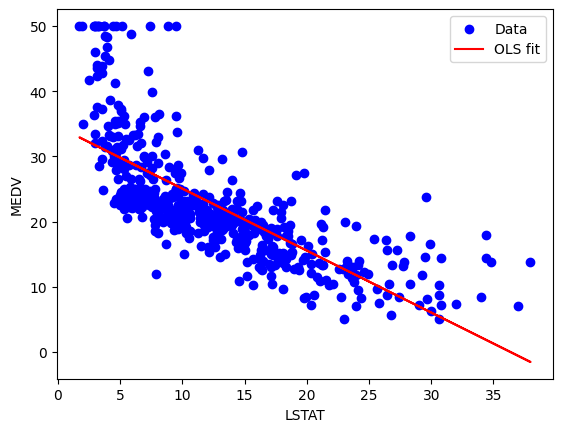

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          7.01e-112
Time:                        10:19:41   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.6

In [18]:
# Load the Boston housing data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = pd.DataFrame(data, columns=feature_names)
y = pd.Series(target, name='MEDV')

# Simple linear regression: MEDV ~ LSTAT
X_lstat = sm.add_constant(X['LSTAT'])  # Adds intercept term
model = sm.OLS(y, X_lstat).fit()
print(model.summary())

# Plot regression line
plt.scatter(X['LSTAT'], y, color='blue', label='Data')
plt.plot(X['LSTAT'], model.predict(X_lstat), color='red', label='OLS fit')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.show()

# Multiple linear regression: MEDV ~ LSTAT + RM
X_multi = sm.add_constant(X[['LSTAT', 'RM']])
model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())